In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random

In [2]:
df_classical = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/classical.csv').drop('Unnamed: 0', axis=1)
df_country = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/country.csv').drop('Unnamed: 0', axis=1)
df_electronic = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/electronic.csv').drop('Unnamed: 0', axis=1)
df_hiphop = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/hip_hop.csv').drop('Unnamed: 0', axis=1)
df_indie = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/indie.csv').drop('Unnamed: 0', axis=1)
df_metal = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/metal.csv').drop('Unnamed: 0', axis=1)
df_jazz = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/jazz.csv').drop('Unnamed: 0', axis=1)
df_latin = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/latin.csv').drop('Unnamed: 0', axis=1)
df_pop = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/pop.csv').drop('Unnamed: 0', axis=1)
df_rb = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/rb.csv').drop('Unnamed: 0', axis=1)
df_rock = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/rock.csv').drop('Unnamed: 0', axis=1)
df_seasonal = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/seasonal.csv').drop('Unnamed: 0', axis=1)
df_funk = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/funk.csv').drop('Unnamed: 0', axis=1)
df_show_tune = pd.read_csv('~/galvanize/capstones/capstone_1/Playlist_CSVs/show_tune.csv').drop('Unnamed: 0', axis=1)

frames = [df_classical, df_country, df_electronic, df_hiphop, df_indie, df_metal, df_jazz, df_latin, df_pop, df_rb, df_rock, df_seasonal, df_funk, df_show_tune]
df_final = pd.concat(frames)

In [3]:
#Add a column to use for the heatmap
df_final['counter'] = 1

In [4]:
#check everything out 
df_final.head()

track  \
0                                  Full Moon - Day 3   
1  Violin Sonata No. 4 in A Minor, Op. 23: III. A...   
2  Hedwig's Theme - From "Harry Potter And The Ph...   
3                                 Light of the Seven   
4  Symphony No. 6 in B Minor, Op. 74 "Pathétique"...   

                     artist  \
0          Ludovico Einaudi   
1      Ludwig van Beethoven   
2             John Williams   
3             Ramin Djawadi   
4  Pyotr Ilyich Tchaikovsky   

                                               album  popularity    time  \
0                         Seven Days Walking (Day 3)          58  218680   
1               Beethoven: Violin Sonatas Nos. 4 & 9          35  336060   
2                                     Hedwig's Theme          54  239916   
3  Game of Thrones (Music from the HBO® Series - ...          69  589094   
4           Tchaikovsky: Symphony No. 6 "Pathétique"          53  526734   

  release_date  track_number  danceability  energy  key   ...    mode  \
0   2019-05-17             9         0.169  0.0156    0   ...       0   
1   2019-05-24             3         0.352  0.1500    9   ...       0   
2   2019-05-10             1         0.360  0.2080    4   ...       0   
3   2016-06-24             3         0.273  0.1020    0   ...       0   
4   2019-05-10             3         0.481  0.3020    7   ...       1   

   speechiness  acoustincess  instrumentalness  liveness  valence    tempo  \
0       0.0428         0.993            0.9730    0.0953   0.0868  101.177   
1       0.0473         0.942            0.0298    0.1080   0.1440  140.334   
2       0.0524         0.922            0.2290    0.4800   0.1680  148.347   
3       0.0494         0.903            0.7210    0.2680   0.0583  120.378   
4       0.0440         0.923            0.9050    0.2030   0.2770   80.988   

   time_signature      genre counter  
0               4  classical       1  
1               4  classical       1  
2               4  classical       1  
3               4  classical       1  
4               4  classical       1  

[5 rows x 21 columns]

In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9604 entries, 0 to 747
Data columns (total 21 columns):
track               9602 non-null object
artist              9602 non-null object
album               9602 non-null object
popularity          9604 non-null int64
time                9604 non-null int64
release_date        9604 non-null object
track_number        9604 non-null int64
danceability        9604 non-null float64
energy              9604 non-null float64
key                 9604 non-null int64
loudness            9604 non-null float64
mode                9604 non-null int64
speechiness         9604 non-null float64
acoustincess        9604 non-null float64
instrumentalness    9604 non-null float64
liveness            9604 non-null float64
valence             9604 non-null float64
tempo               9604 non-null float64
time_signature      9604 non-null int64
genre               9604 non-null object
counter             9604 non-null int64
dtypes: float64(9), int64(7), o

In [6]:
#find if there are duplicates
df_final.duplicated

<bound method DataFrame.duplicated of                                                  track  \
0                                    Full Moon - Day 3   
1    Violin Sonata No. 4 in A Minor, Op. 23: III. A...   
2    Hedwig's Theme - From "Harry Potter And The Ph...   
3                                   Light of the Seven   
4    Symphony No. 6 in B Minor, Op. 74 "Pathétique"...   
5      Bagatelle No. 25 in A Minor, WoO 59 "Für Elise"   
6    Cantabile, MS 109/Op. 17 (Arr. for Cello and G...   
7    Schumann: Widmung, Op. 25 No. 1 (Arr. Liszt, S...   
8                    Golden Butterflies Var. 1 - Day 2   
9    Trio in D Minor, Op. 63: I. Mit Energie und Le...   
10   Holst: The Planets, Op. 32: I. Mars, the Bring...   
11                                         Etude No. 2   
12          I. Lento—Sostenuto tranquillo ma cantabile   
13   Deux Arabesques, L. 66: 1. Andantino con moto ...   
14                                             Minerva   
15   Organ Sonata No. 4, BWV 528: 

In [7]:
#drop duplicates 
df_final.drop_duplicates(inplace=True)

In [8]:
#convert miliseconds to seconds
df_final['time'] = df_final['time']//1000

In [9]:
#change the release date so that it is only the release year 
date_list = [date[0:4] for date in df_final['release_date']]
df_final['release_date'] = date_list  

In [10]:
#create a list of distinct genres
attribute_list = ['danceability', 'energy', 'key', 'loudness', 'mode',
                                                'speechiness', 'acoustincess', 'instrumentalness', 'liveness',
                                                'valence', 'tempo', 'time_signature', 'danceability']

Visualization 

Text(0, 0.5, 'Genre')

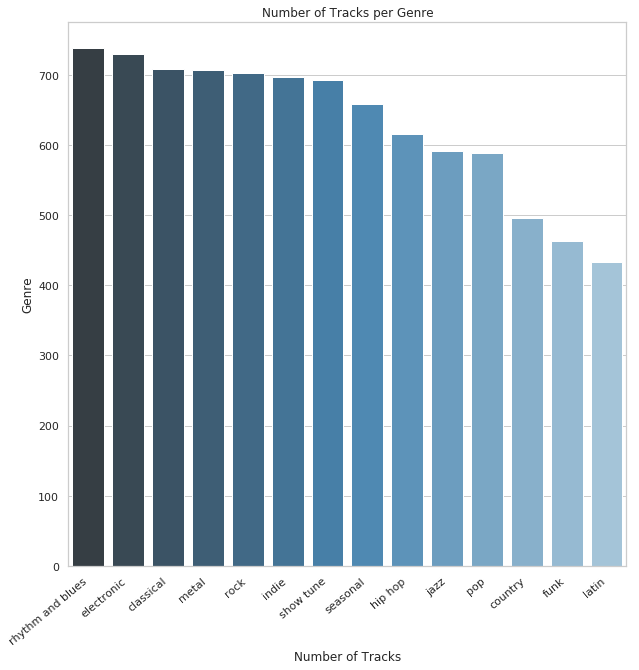

In [12]:
#Barplot to show the number of tracks per 
df_genre = df_final.groupby('genre').count().reset_index().sort_values(by='track', ascending=False)
fig = plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='genre', y='track', data=df_genre, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Number of Tracks per Genre')
ax.set_xlabel('Number of Tracks')
ax.set_ylabel('Genre')

Text(0, 0.5, 'Genre')

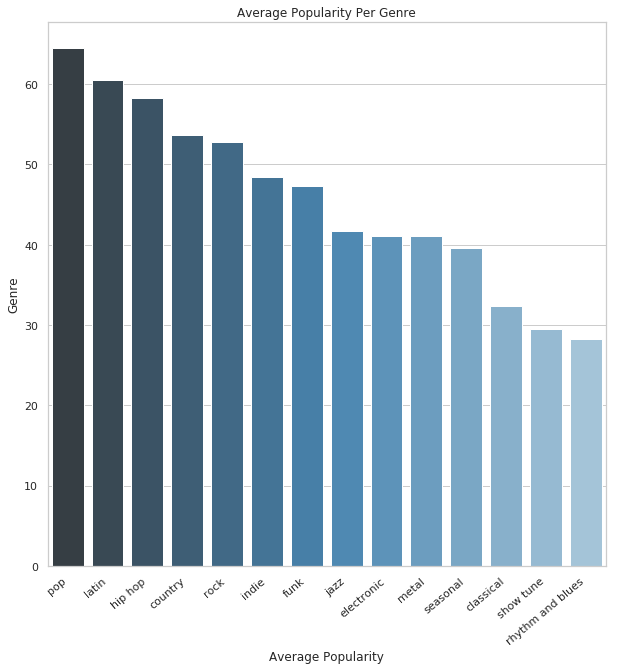

In [13]:
#which genre has the highest average popularity 
df_sum_pop = df_final.groupby('genre').sum().reset_index()[['genre', 'popularity']]
df_count_pop = df_final.groupby('genre').count().reset_index()[['genre', 'popularity']]

merged_inner = df_sum_pop.merge(right=df_count_pop, left_on='genre', right_on='genre')
merged_inner['average_popularity'] = merged_inner['popularity_x'] / merged_inner['popularity_y']
chart_val = merged_inner.sort_values(by='average_popularity', ascending=False)[['genre', 'average_popularity']]
chart_val

#chart average popularity by genre
fig = plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='genre', y='average_popularity', data=chart_val, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Average Popularity Per Genre')
ax.set_xlabel('Average Popularity')
ax.set_ylabel('Genre')

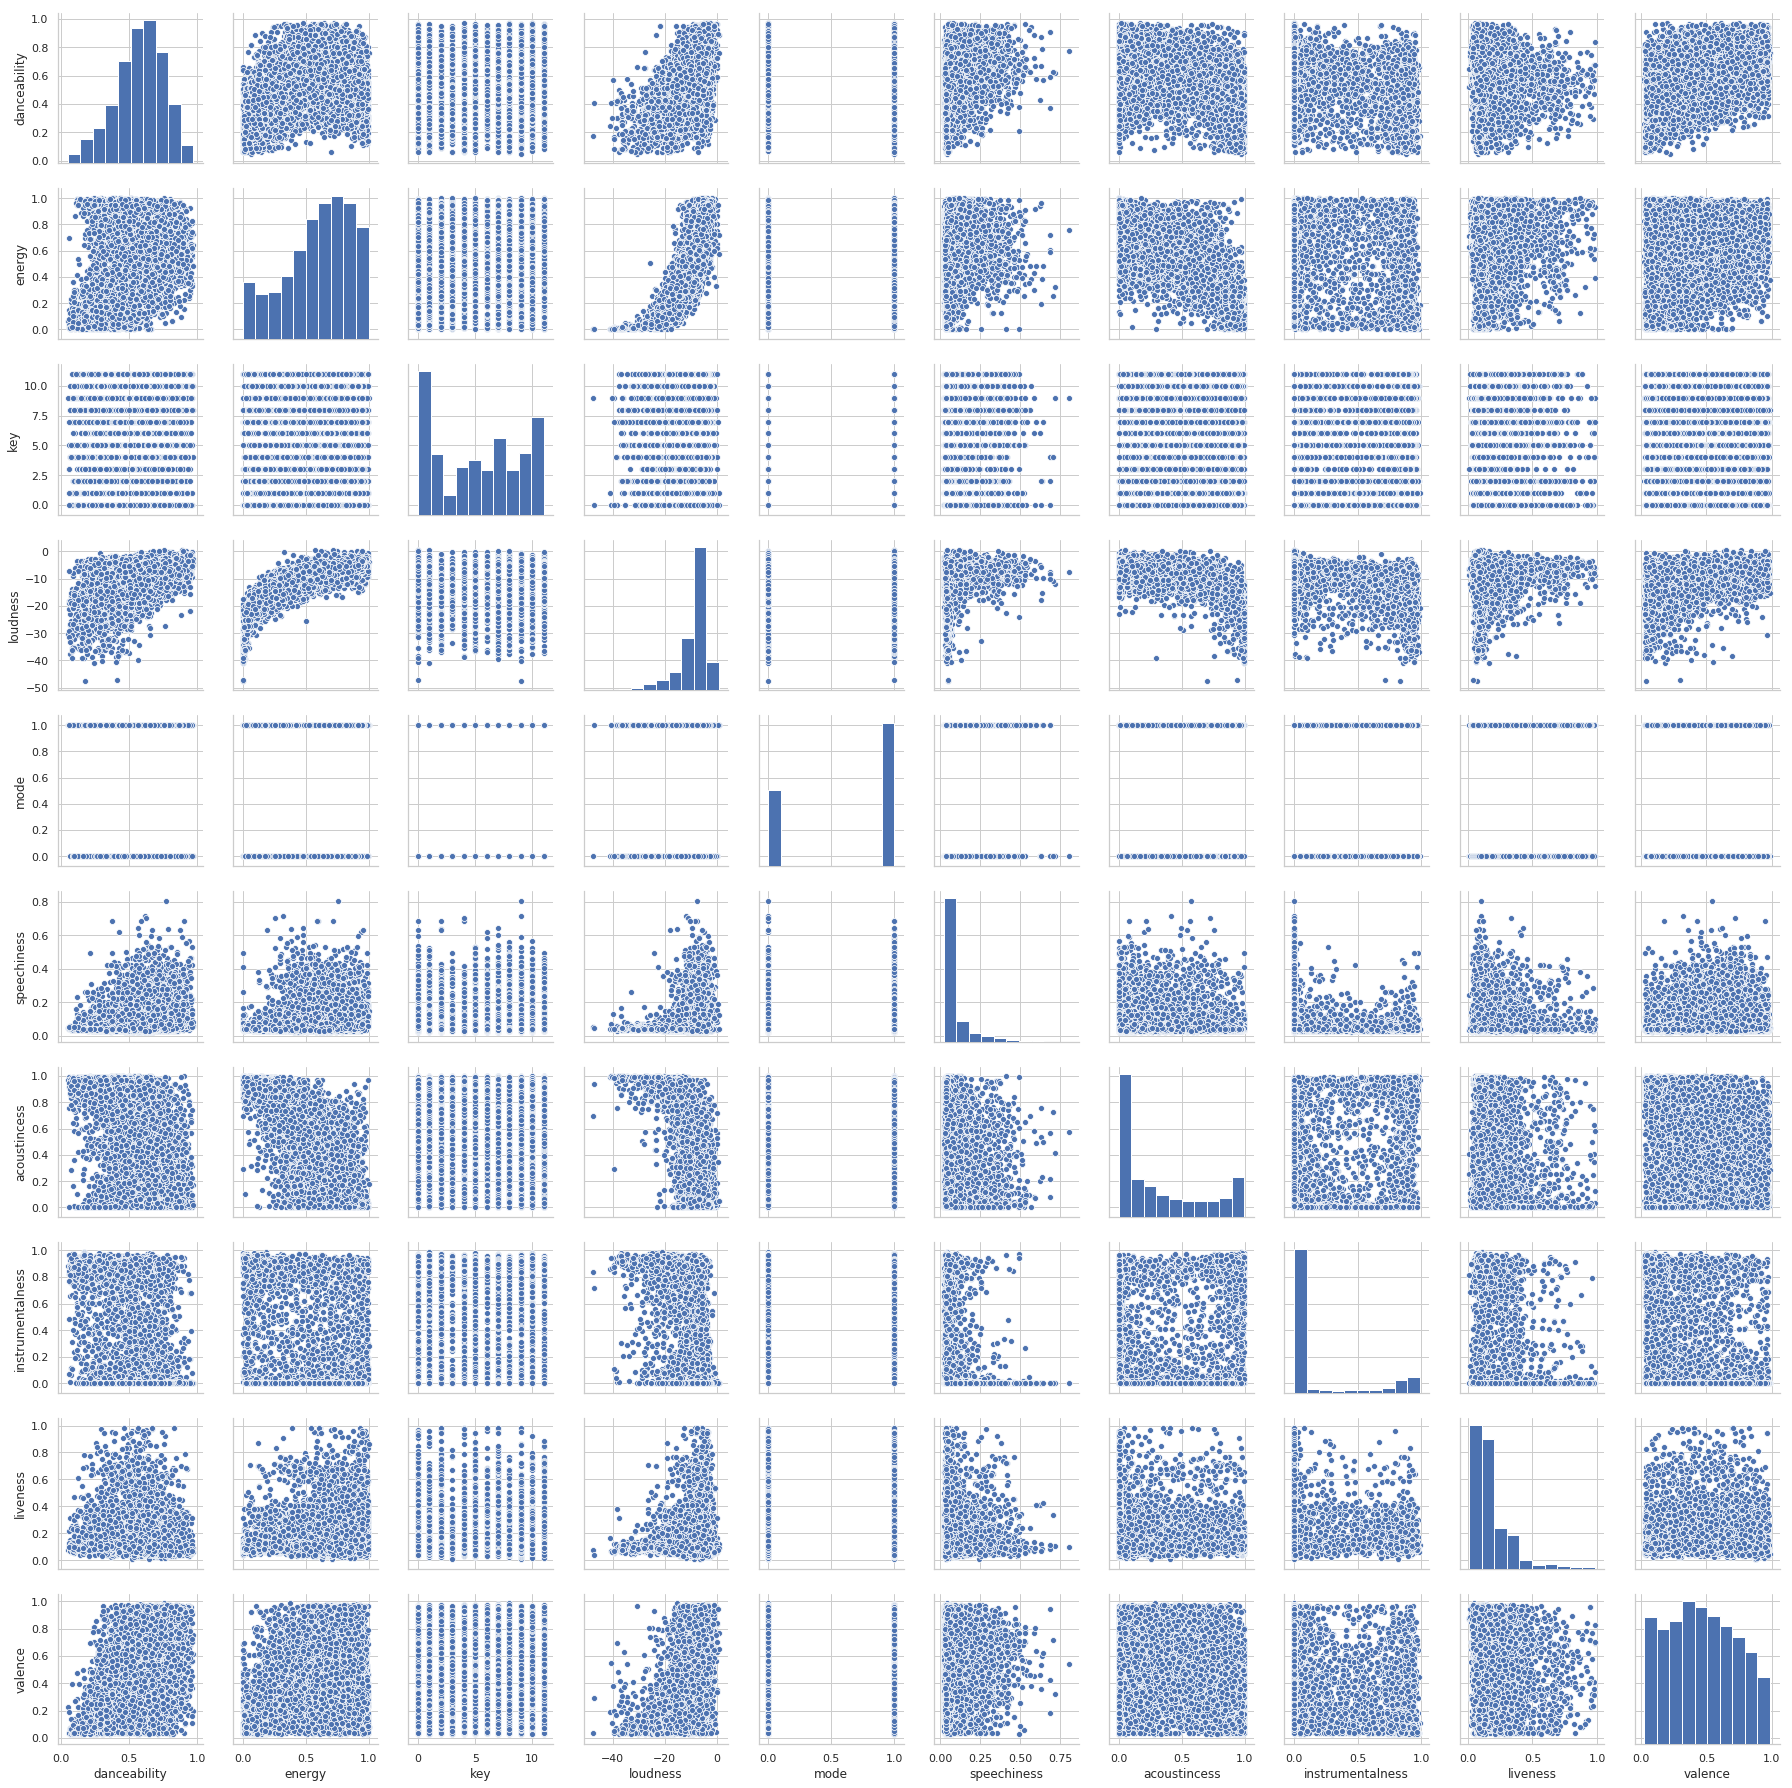

In [16]:
df_pairplot = df_final.loc[:, ]
sns.pairplot(df_pairplot)

/home/jrsilber/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

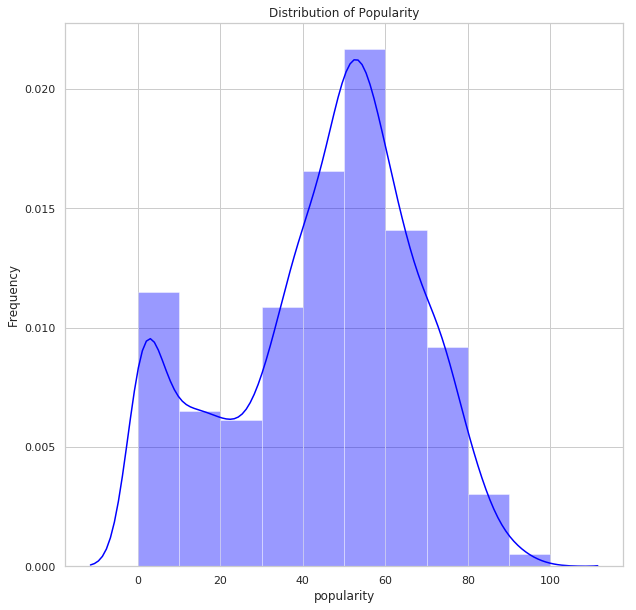

In [244]:
# what does the kde line mean? 
fig = plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.distplot(df_final.popularity, bins=10, color='blue')
ax.set_title("Distribution of Popularity")
ax.set_ylabel('Frequency')

Proportion of songs with a popularity rating of 90 or more: '0.49'%


/home/jrsilber/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


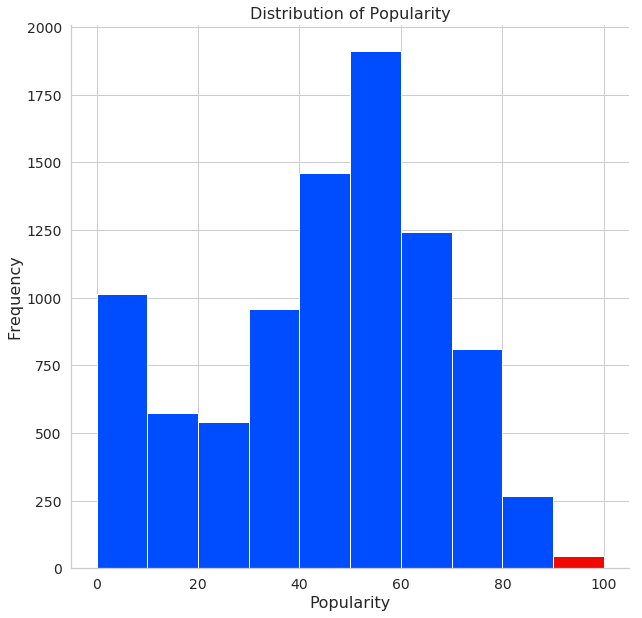

In [23]:
df_really_popular = df_final.query('popularity >= 90')
pop_proportion = len(df_really_popular)/len(df_final) *100
print("Proportion of songs with a popularity rating of 90 or more: '{}'%".format(str(pop_proportion)[0:4]))
fig = plt.figure(figsize = (10, 10))
N, bins, patches = plt.hist(df_final['popularity'], 10)

cmap = plt.get_cmap('jet')
below = cmap(0.2)
above =cmap(0.9)

for i in range(0,9):
    patches[i].set_facecolor(below)
for i in range(9, 10):
    patches[i].set_facecolor(above)

plt.xlabel("Popularity", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.title('Distribution of Popularity', fontsize=16)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

energy 0.10246551811635785
key -0.0003577800032696231
loudness 0.2133103895895865
mode 0.00642280124788191
speechiness 0.09862942096722851
acoustincess -0.1625903407798592
instrumentalness -0.2148087639833725
liveness -0.06055310890287702
valence 0.08651735102204645
tempo 0.02338872432622844
time_signature 0.06371966443429973
danceability 0.21523820878622782


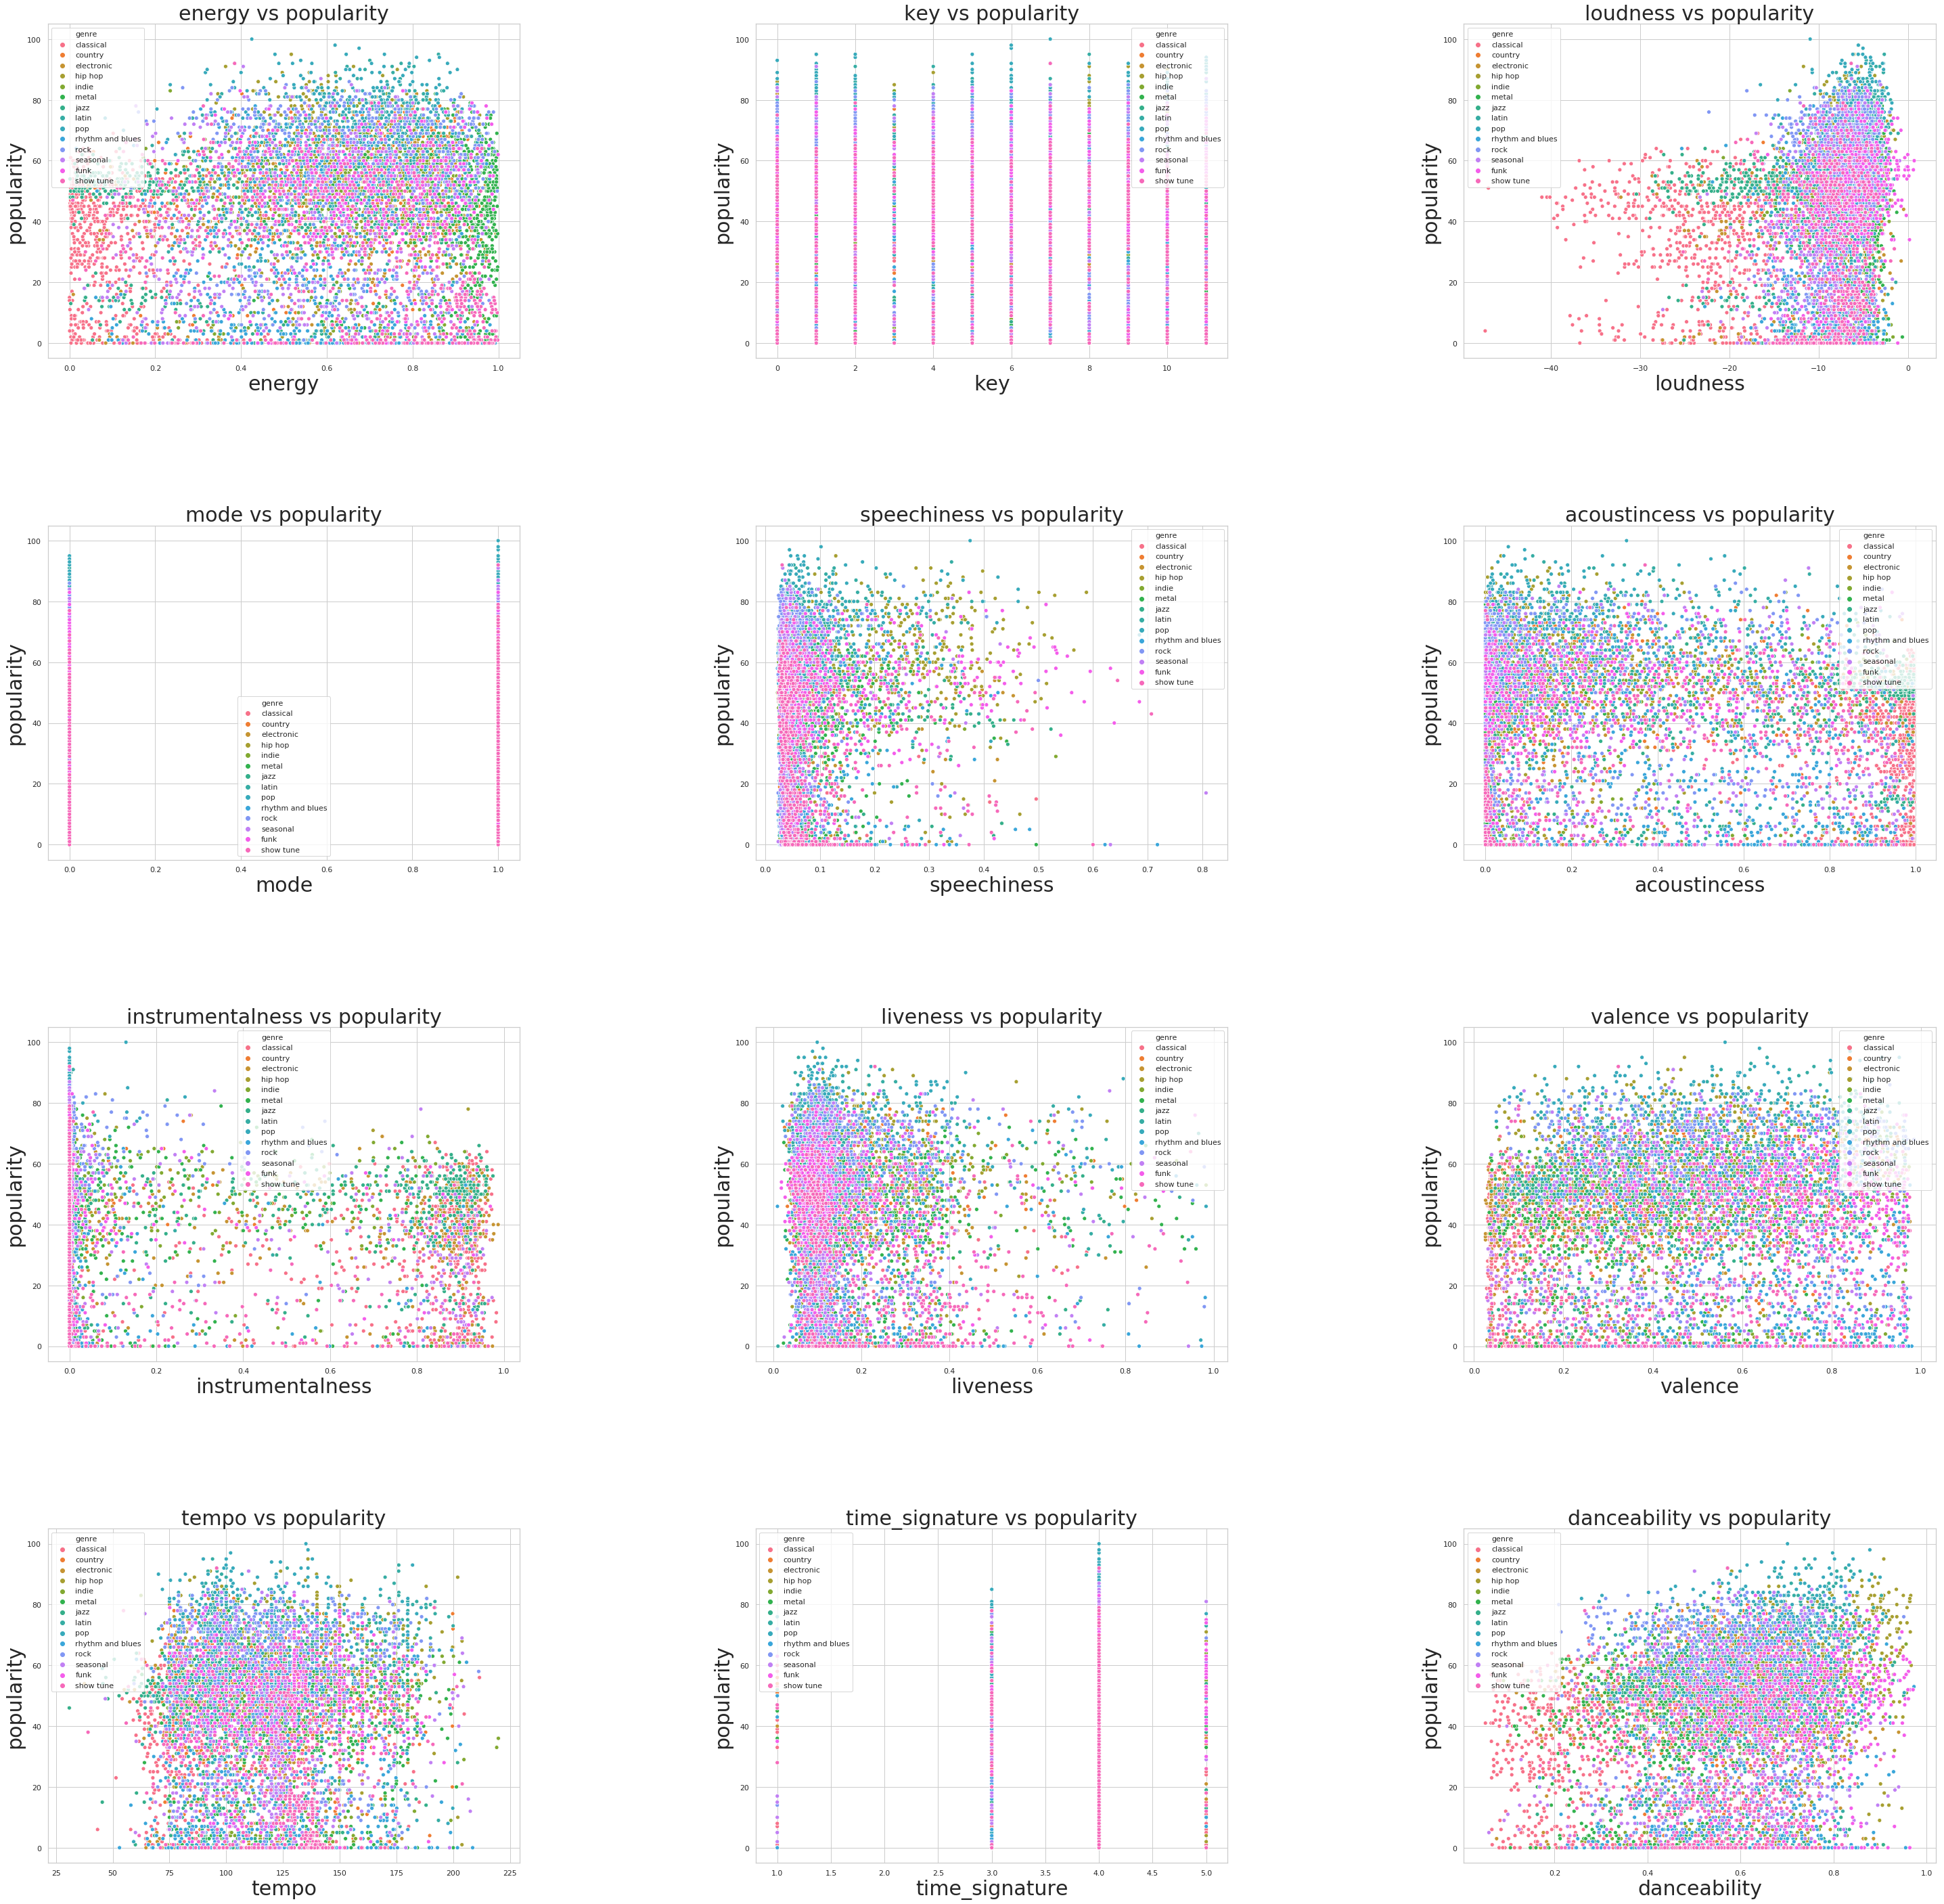

In [17]:
#create scatterplots of all attributes vs. popularity
fig = plt.figure(figsize = (50, 50))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, len(attribute_list)):
    ax = fig.add_subplot(4, 3, i)
    x = df_final[attribute_list[i]]
    y = df_final['popularity']
    sns.scatterplot(x, y, hue=df_final['genre'])
    ax.set_ylabel('popularity', fontsize=30)
    ax.set_xlabel(attribute_list[i], fontsize=30)
    ax.set_title(str(attribute_list[i]) + ' ' + 'vs popularity', fontsize=30)
    print(attribute_list[i], linregress(x, y)[2])

In [23]:
#create a dataframe for genre
df_pop = df_final.query("genre == 'pop'")

energy 0.009335991182216579
key -0.014586478145277392
loudness 0.0634729392756314
mode -0.016649197271855175
speechiness 0.13516667565642507
acoustincess -0.03453500236537223
instrumentalness 0.06701977057209672
liveness -0.023908232777096094
valence 0.027950384174874107
tempo -0.06794612005314313
time_signature 0.028412628306942245
danceability 0.17820952974981227


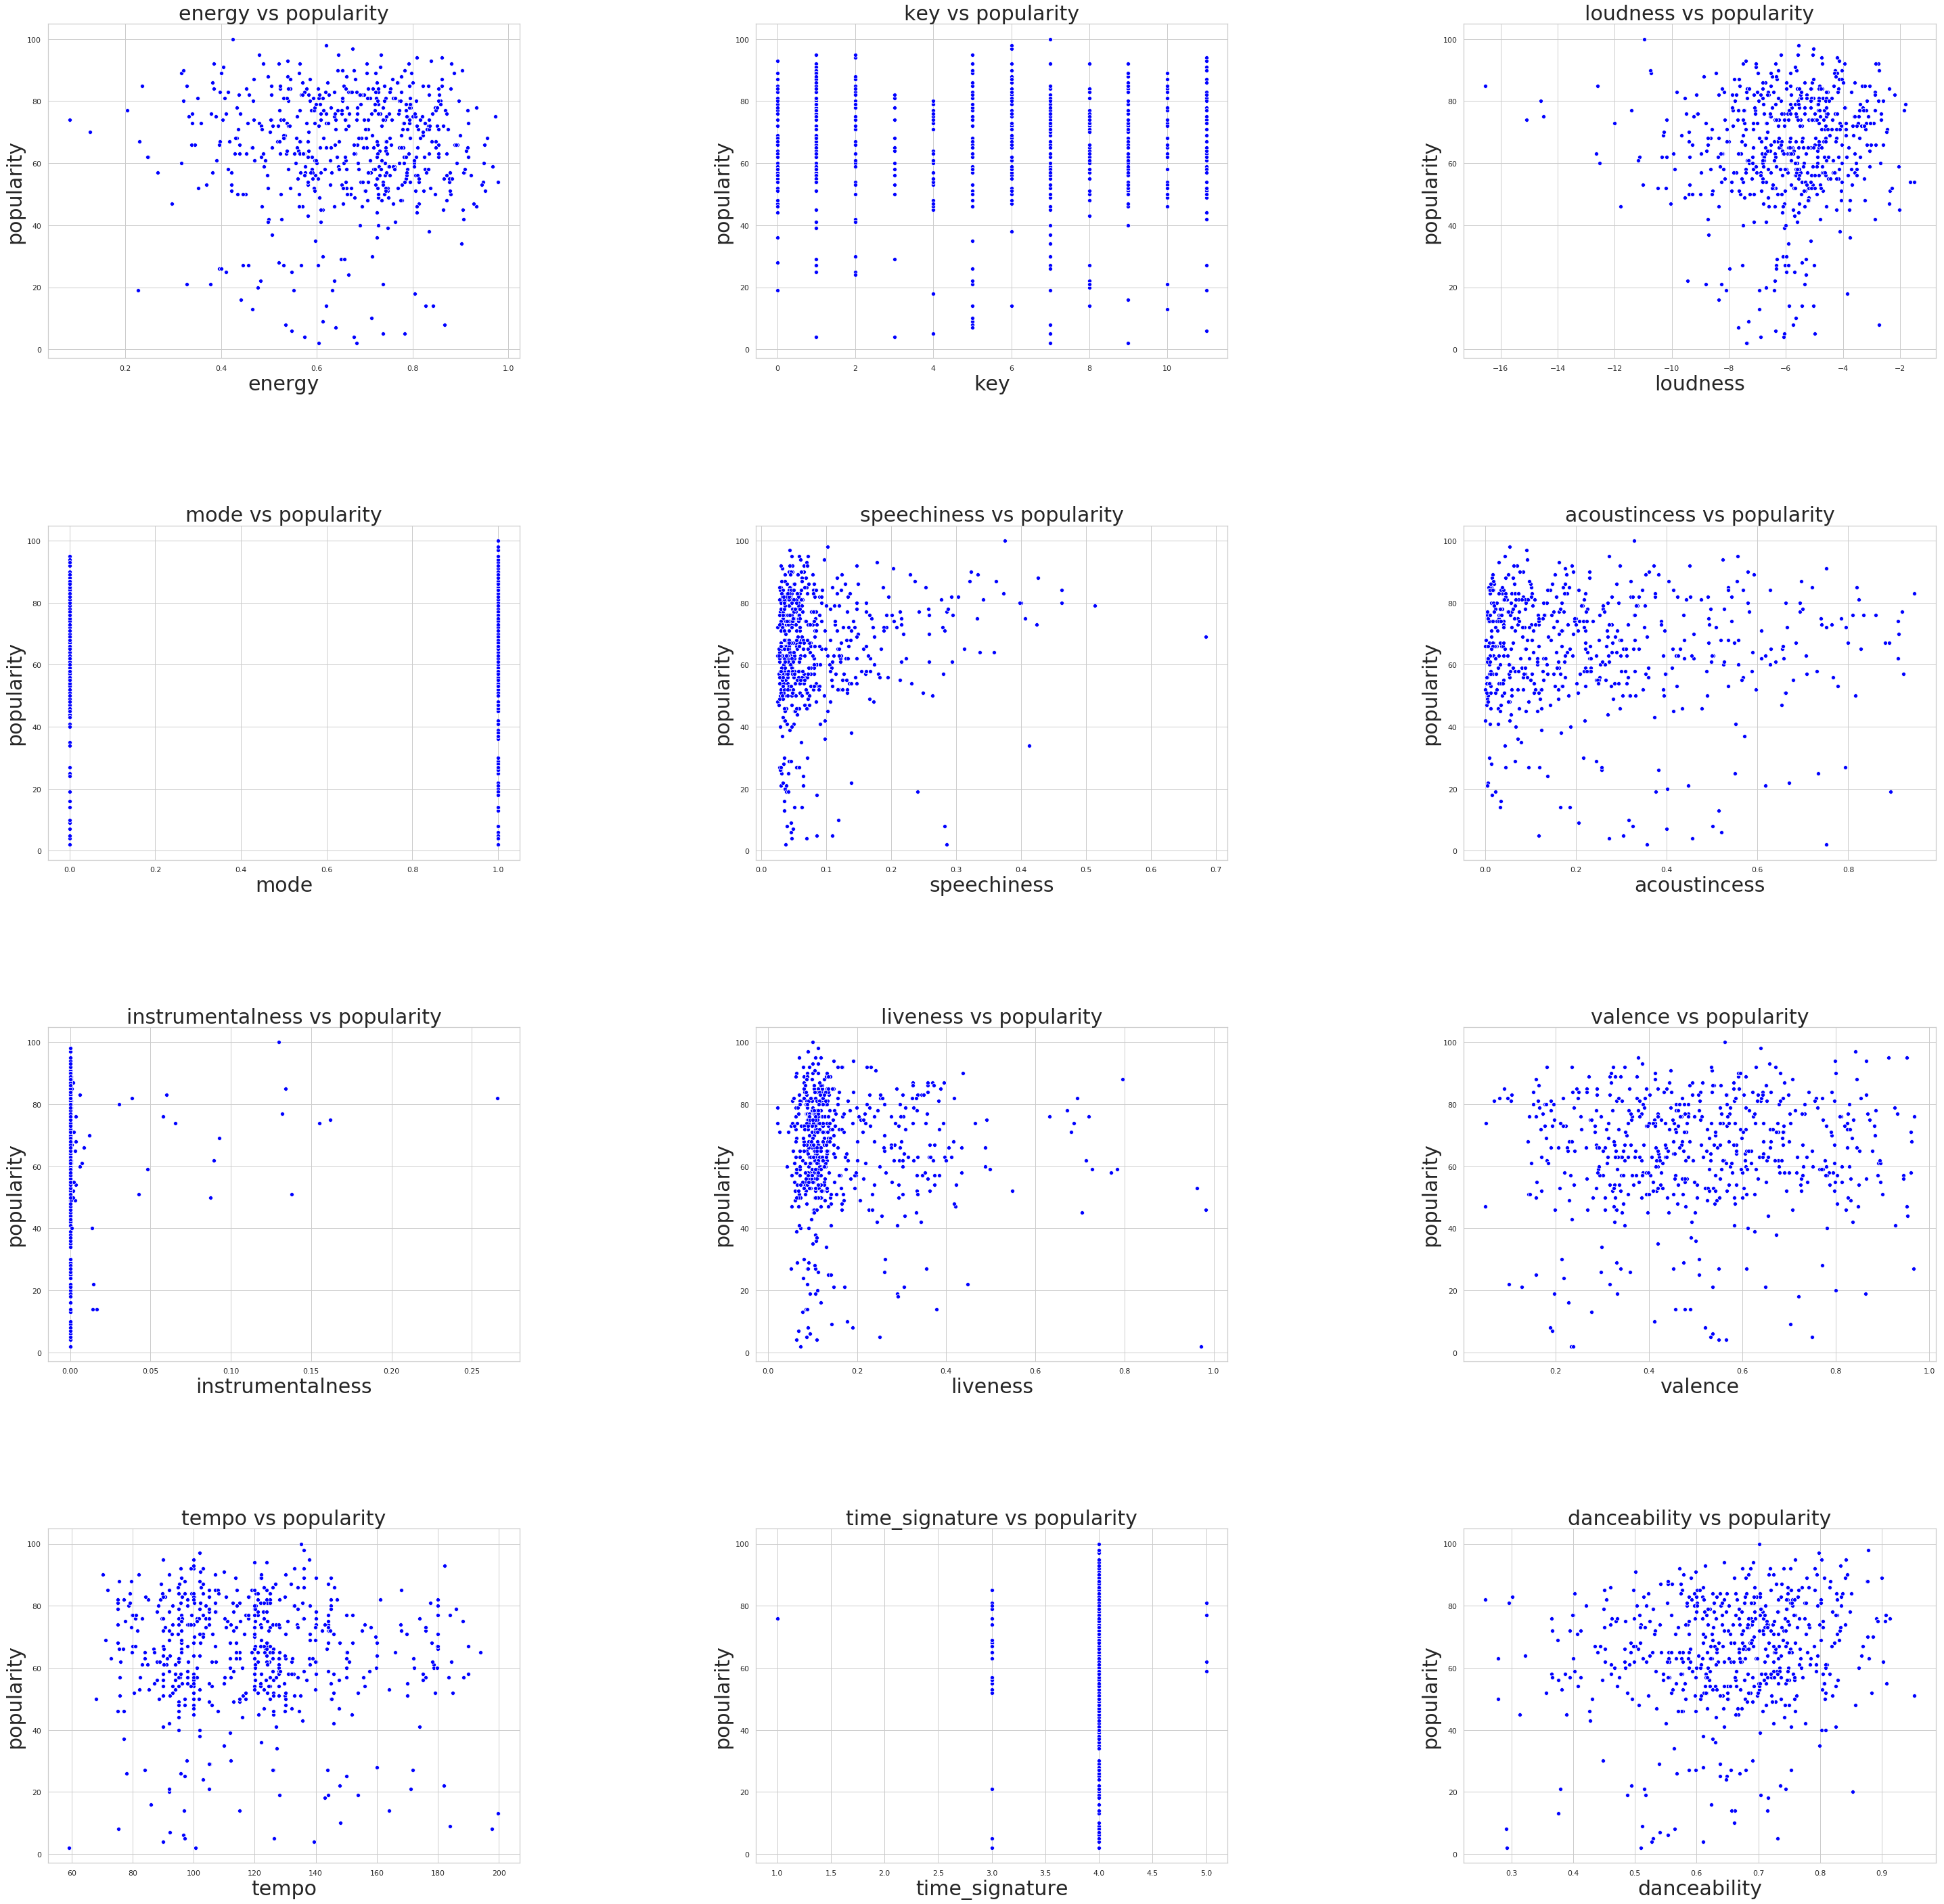

In [19]:
#create scatterplots of all attributes vs. popularity
fig = plt.figure(figsize = (50, 50))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, len(attribute_list)):
    ax = fig.add_subplot(4, 3, i)
    x = df_pop[attribute_list[i]]
    y = df_pop['popularity']
    sns.scatterplot(x, y, color='blue')
    ax.set_ylabel('popularity', fontsize=30)
    ax.set_xlabel(attribute_list[i], fontsize=30)
    ax.set_title(str(attribute_list[i]) + ' ' + 'vs popularity', fontsize=30)
    print(attribute_list[i], linregress(x, y)[2])

In [20]:
#what do attributes of most popular songs look like? 
df_really_popular = df_final.query('popularity >= 90')

energy -0.09367079338192692 <class 'int'>
key -0.08937279602942017 <class 'int'>
loudness -0.16068018626268876 <class 'int'>
mode 0.13136901089224193 <class 'int'>
speechiness 0.0412742304165536 <class 'int'>
acoustincess -0.2735929645960497 <class 'int'>
instrumentalness 0.4208907489572419 <class 'int'>
liveness -0.25962391728748896 <class 'int'>
valence 0.22455241135950652 <class 'int'>
tempo 0.2681901397846175 <class 'int'>
time_signature 0.0 <class 'int'>
danceability 0.3576259487457735 <class 'int'>


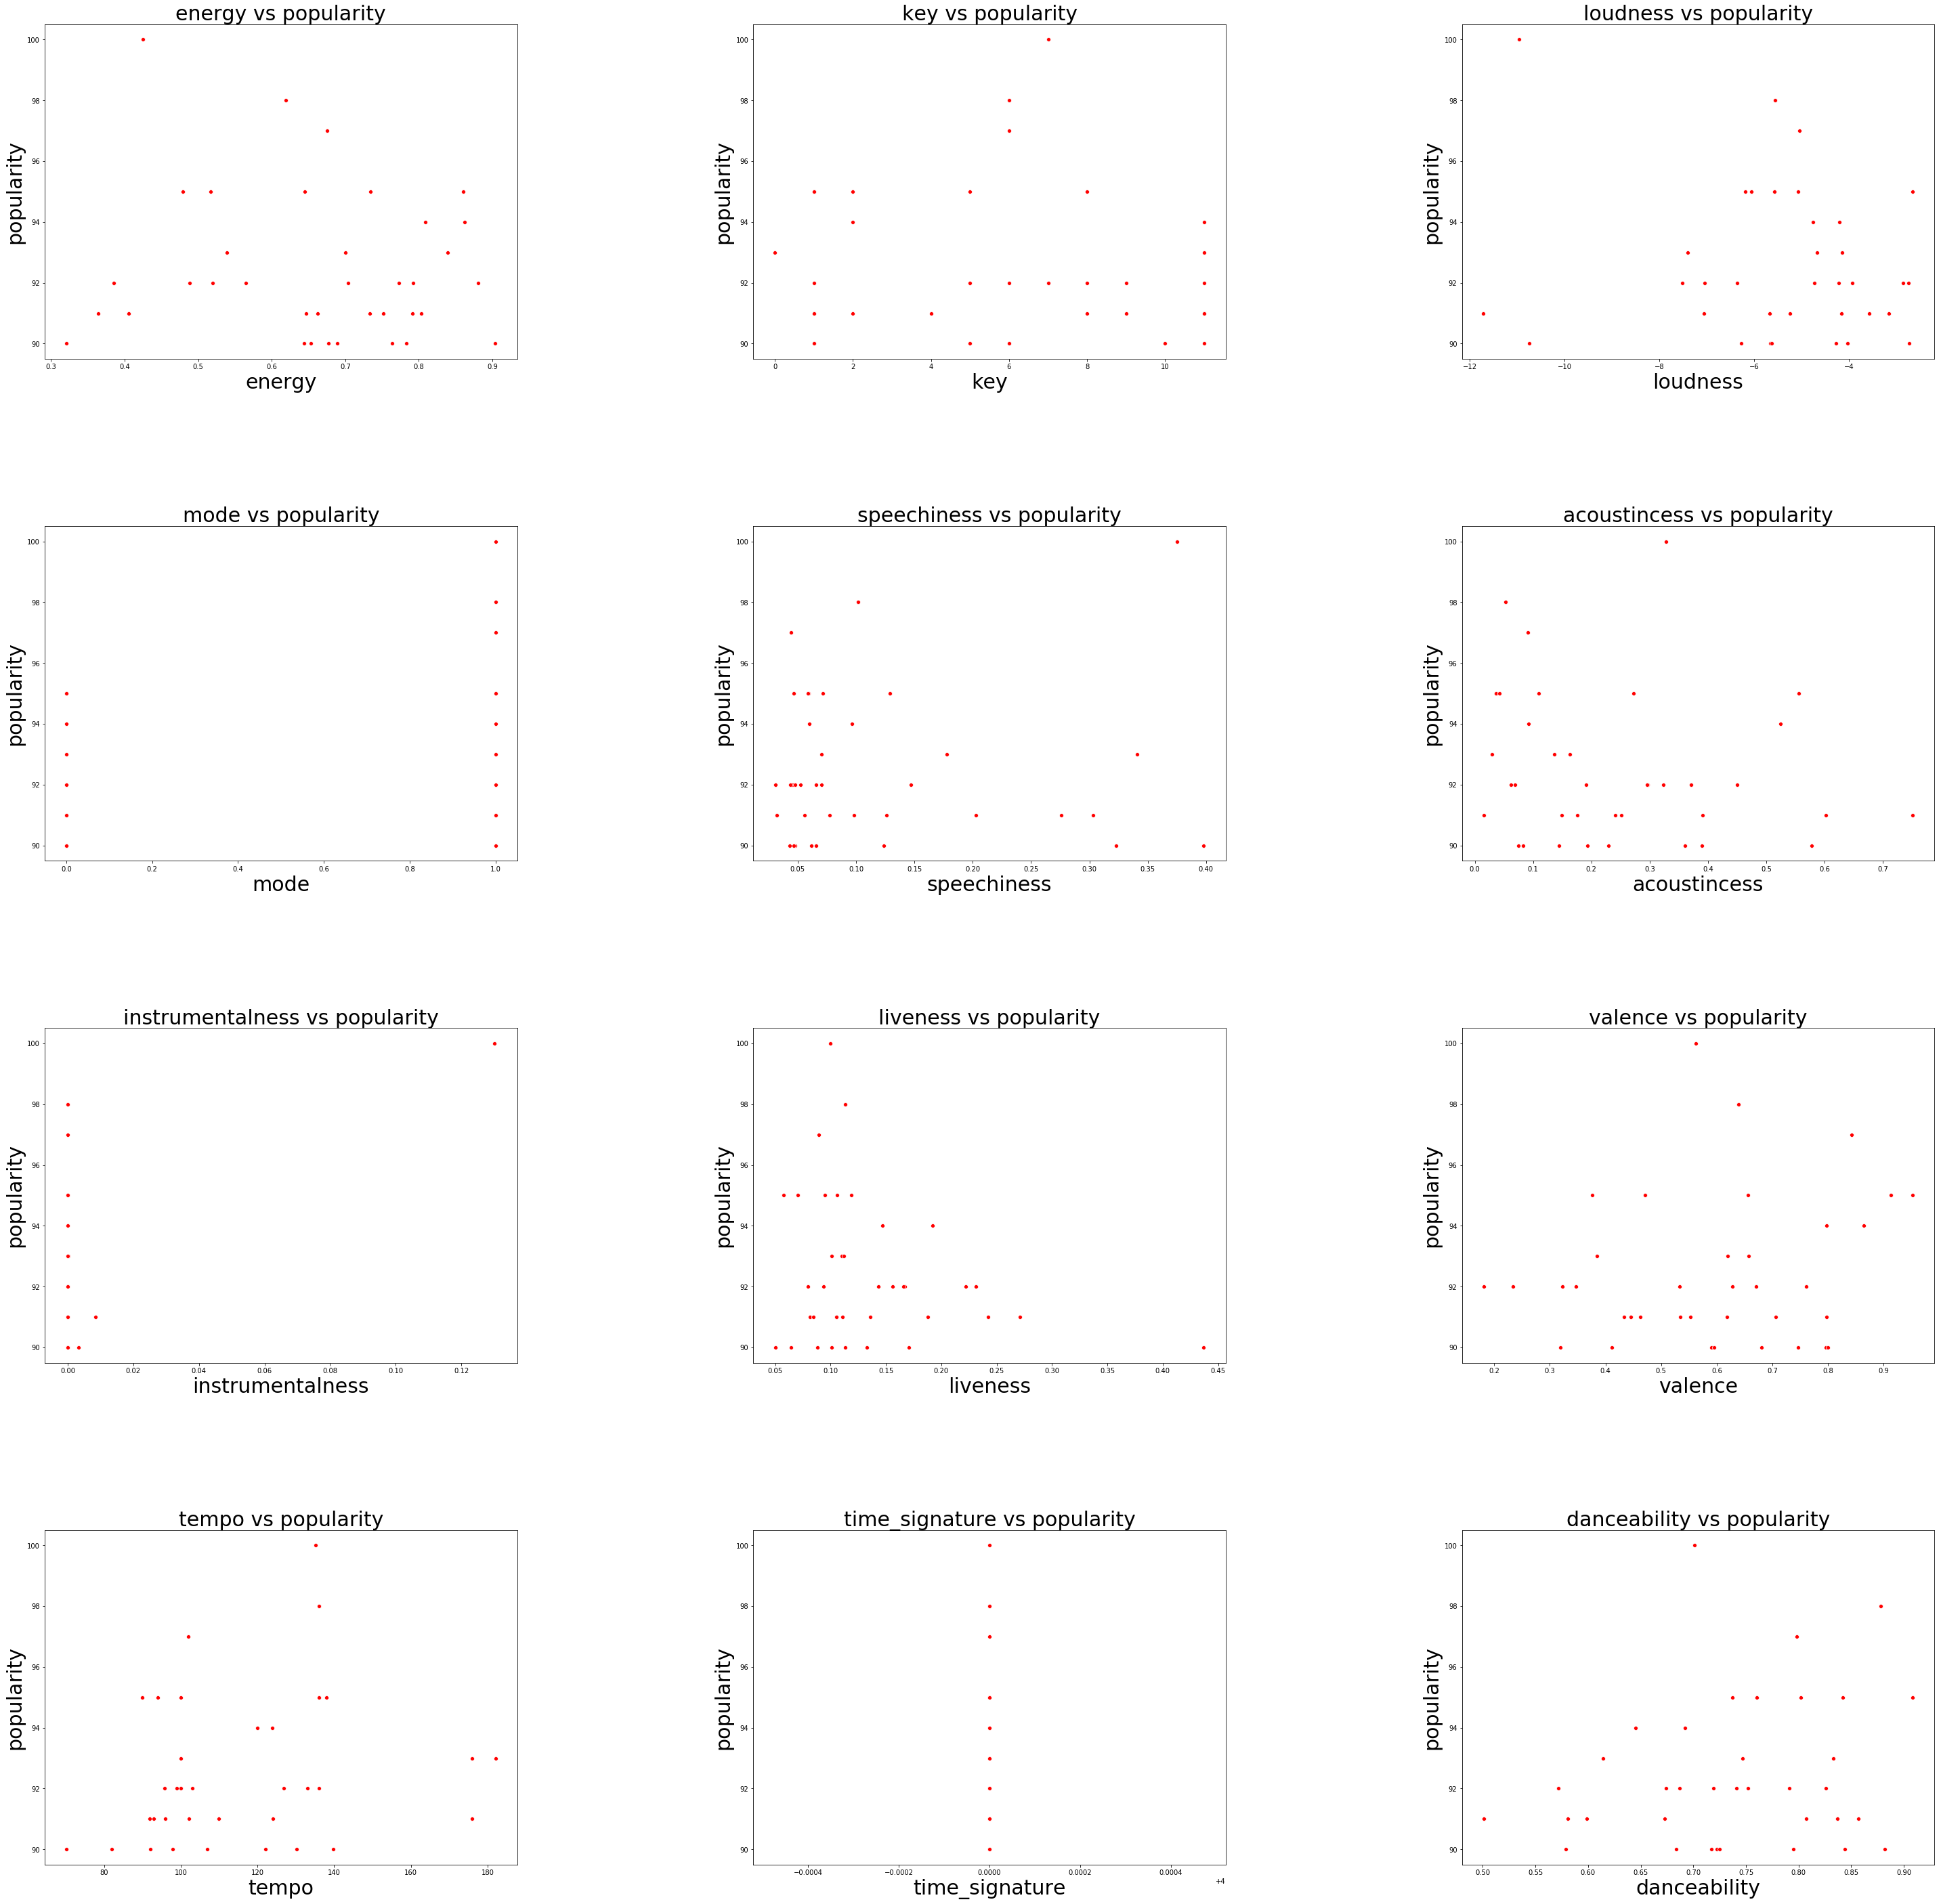

In [143]:
#what do attributes of most popular songs look like? 
df_really_popular = df_final.query('popularity >= 90')
#create scatterplots of all attributes vs. popularity
fig = plt.figure(figsize = (50, 50))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, len(attribute_list)):
    ax = fig.add_subplot(4, 3, i)
    x = df_really_popular[attribute_list[i]]
    y = df_really_popular['popularity']
    sns.scatterplot(x, y, color='red')
    ax.set_ylabel('popularity', fontsize=30)
    ax.set_xlabel(attribute_list[i], fontsize=30)
    ax.set_title(str(attribute_list[i]) + ' ' + 'vs popularity', fontsize=30)
    print(attribute_list[i], linregress(x, y)[2], type(int(linregress(x,y)[2])))

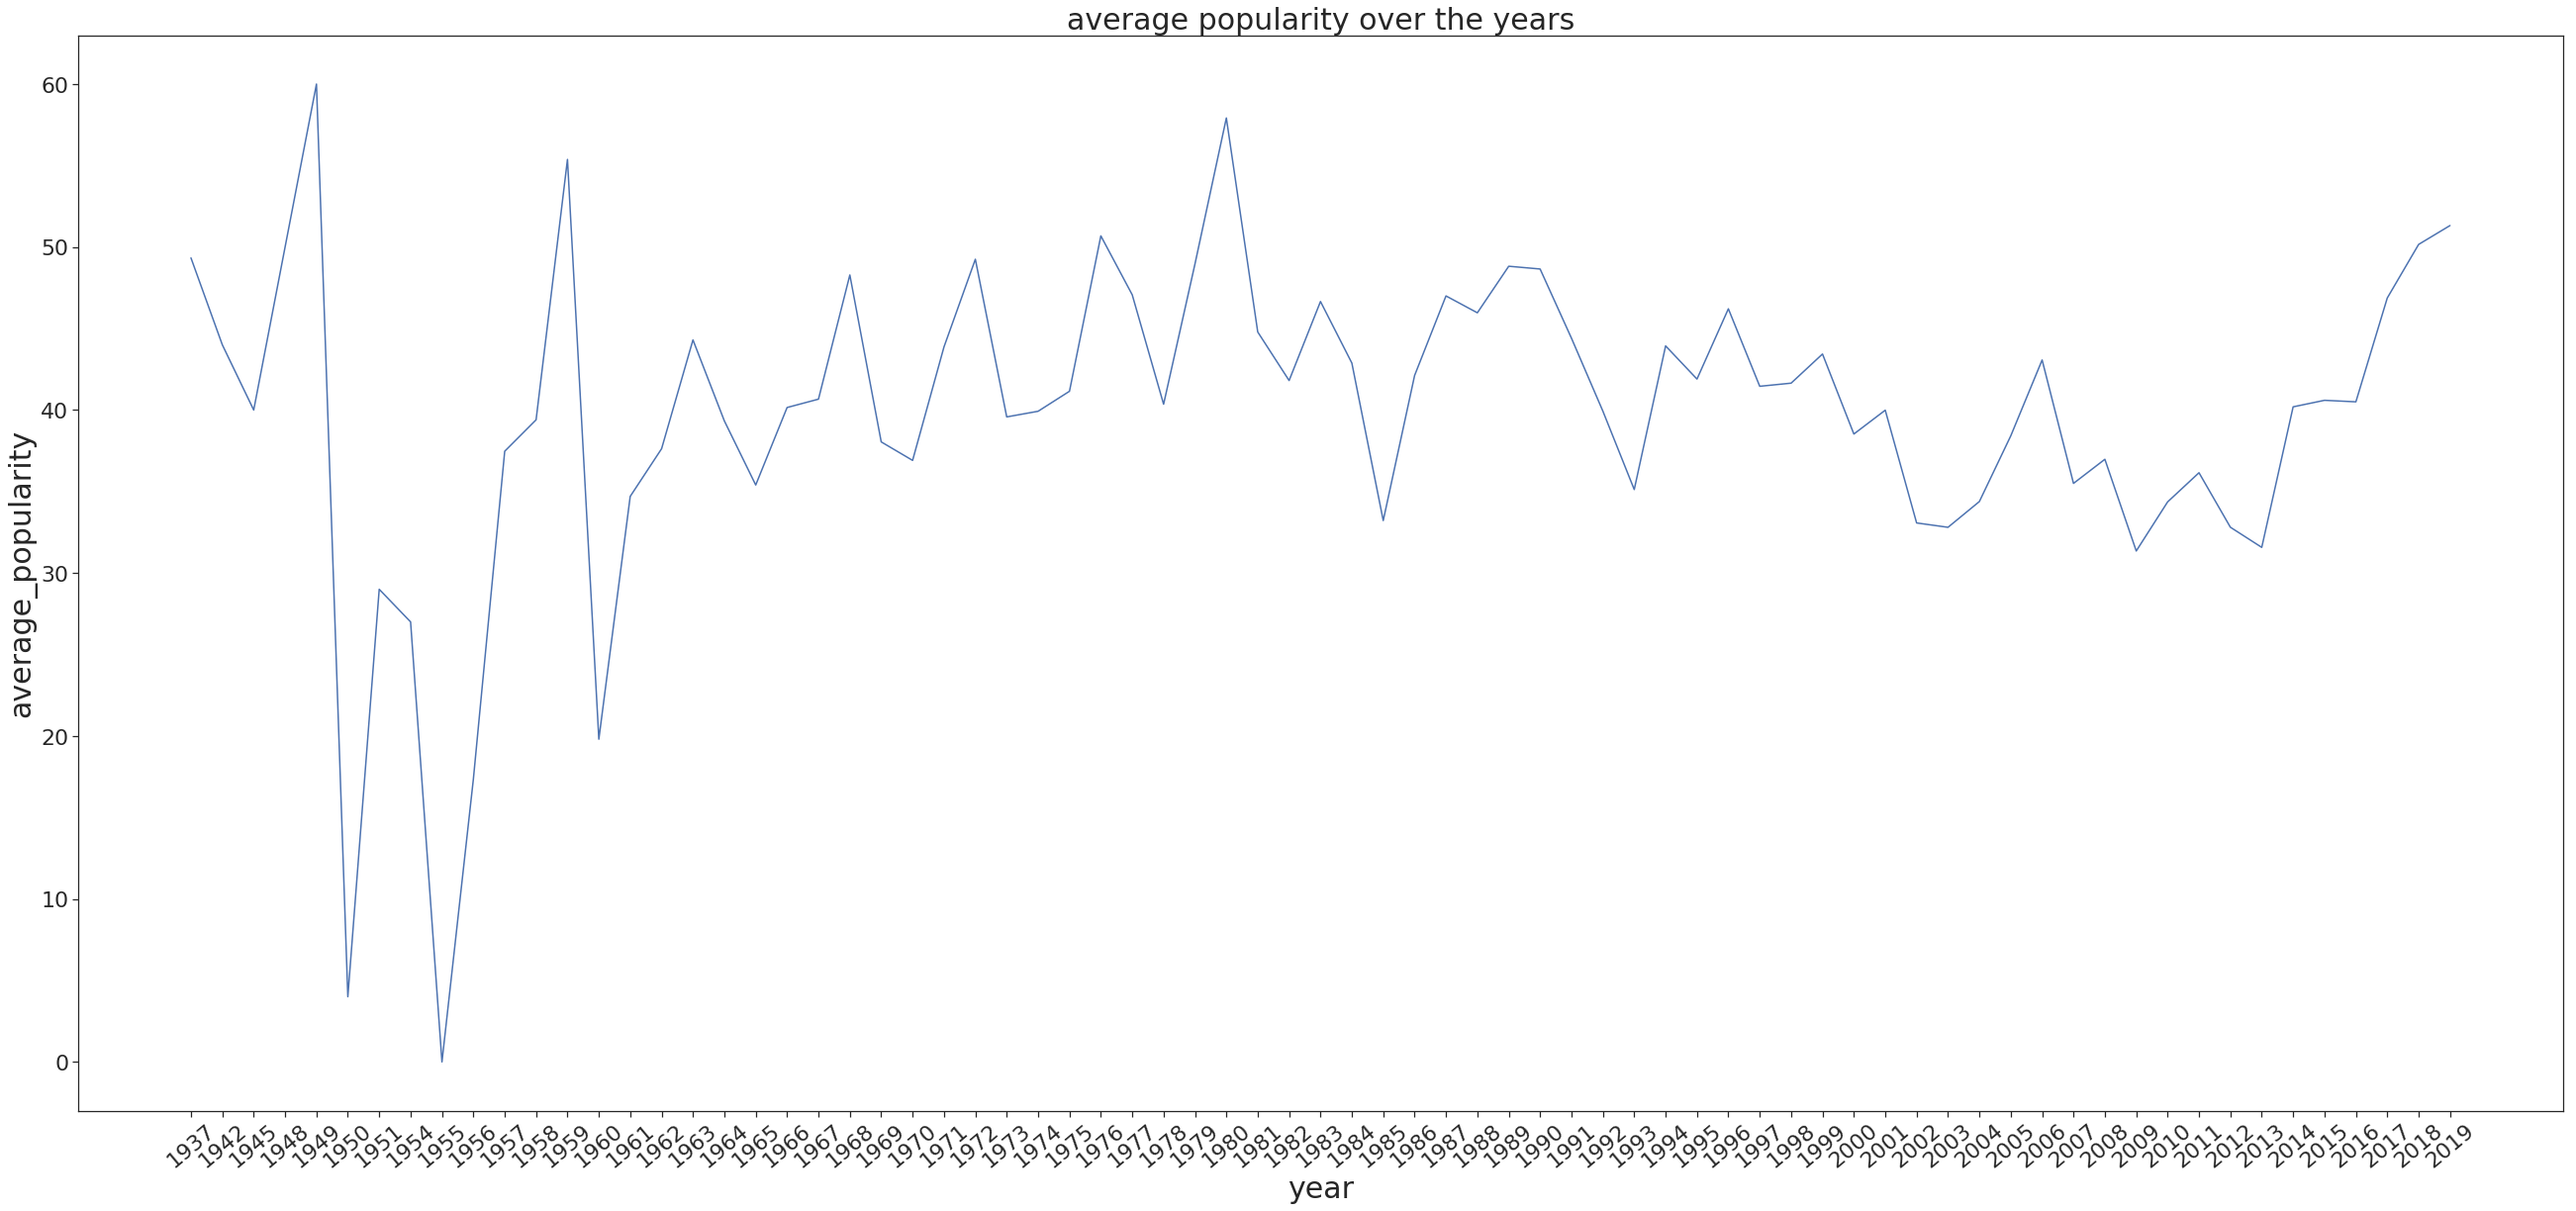

In [88]:
#how has popularity changed over the years? 

df_sum_pop = df_final.groupby('release_date').sum().reset_index()[['release_date', 'popularity']]
df_count_pop = df_final.groupby('release_date').count().reset_index()[['release_date', 'popularity']]

merged_inner = df_sum_pop.merge(right=df_count_pop, left_on='release_date', right_on='release_date')
merged_inner['average_popularity'] = merged_inner['popularity_x'] / merged_inner['popularity_y']
chart_val = merged_inner.sort_values(by='release_date')[['release_date', 'average_popularity']]
chart_val

fig = plt.figure(figsize = (45, 20))
sns.set(style="white", font_scale = 2)
sns.set_style("ticks")
ax = sns.lineplot(chart_val['release_date'], chart_val['average_popularity'])
ax.set_ylabel('average_popularity', fontsize=30)
ax.set_xlabel('year', fontsize=30)
ax.set_title('average popularity over the years', fontsize=30)
ax.set_xticklabels(sorted(df_final['release_date'].unique()), rotation=40)
fig.savefig('average_popularity_over_the_years.png')


Classical 0.2882314637482901
Country 0.5768957983193278
Electronic 0.6137251691474962
Hip Hop 0.7474151212553488
Jazz 0.5971417119565219
Latin 0.44165155440414483
Pop 0.5654843260188088
R&B 0.6882976406533572
Rock 0.6526740237690999
Seasonal 0.6178264781491005
Funk 0.5399640479360848
Show Tune 0.5898257918552039
All Genres 0.7568836772983116


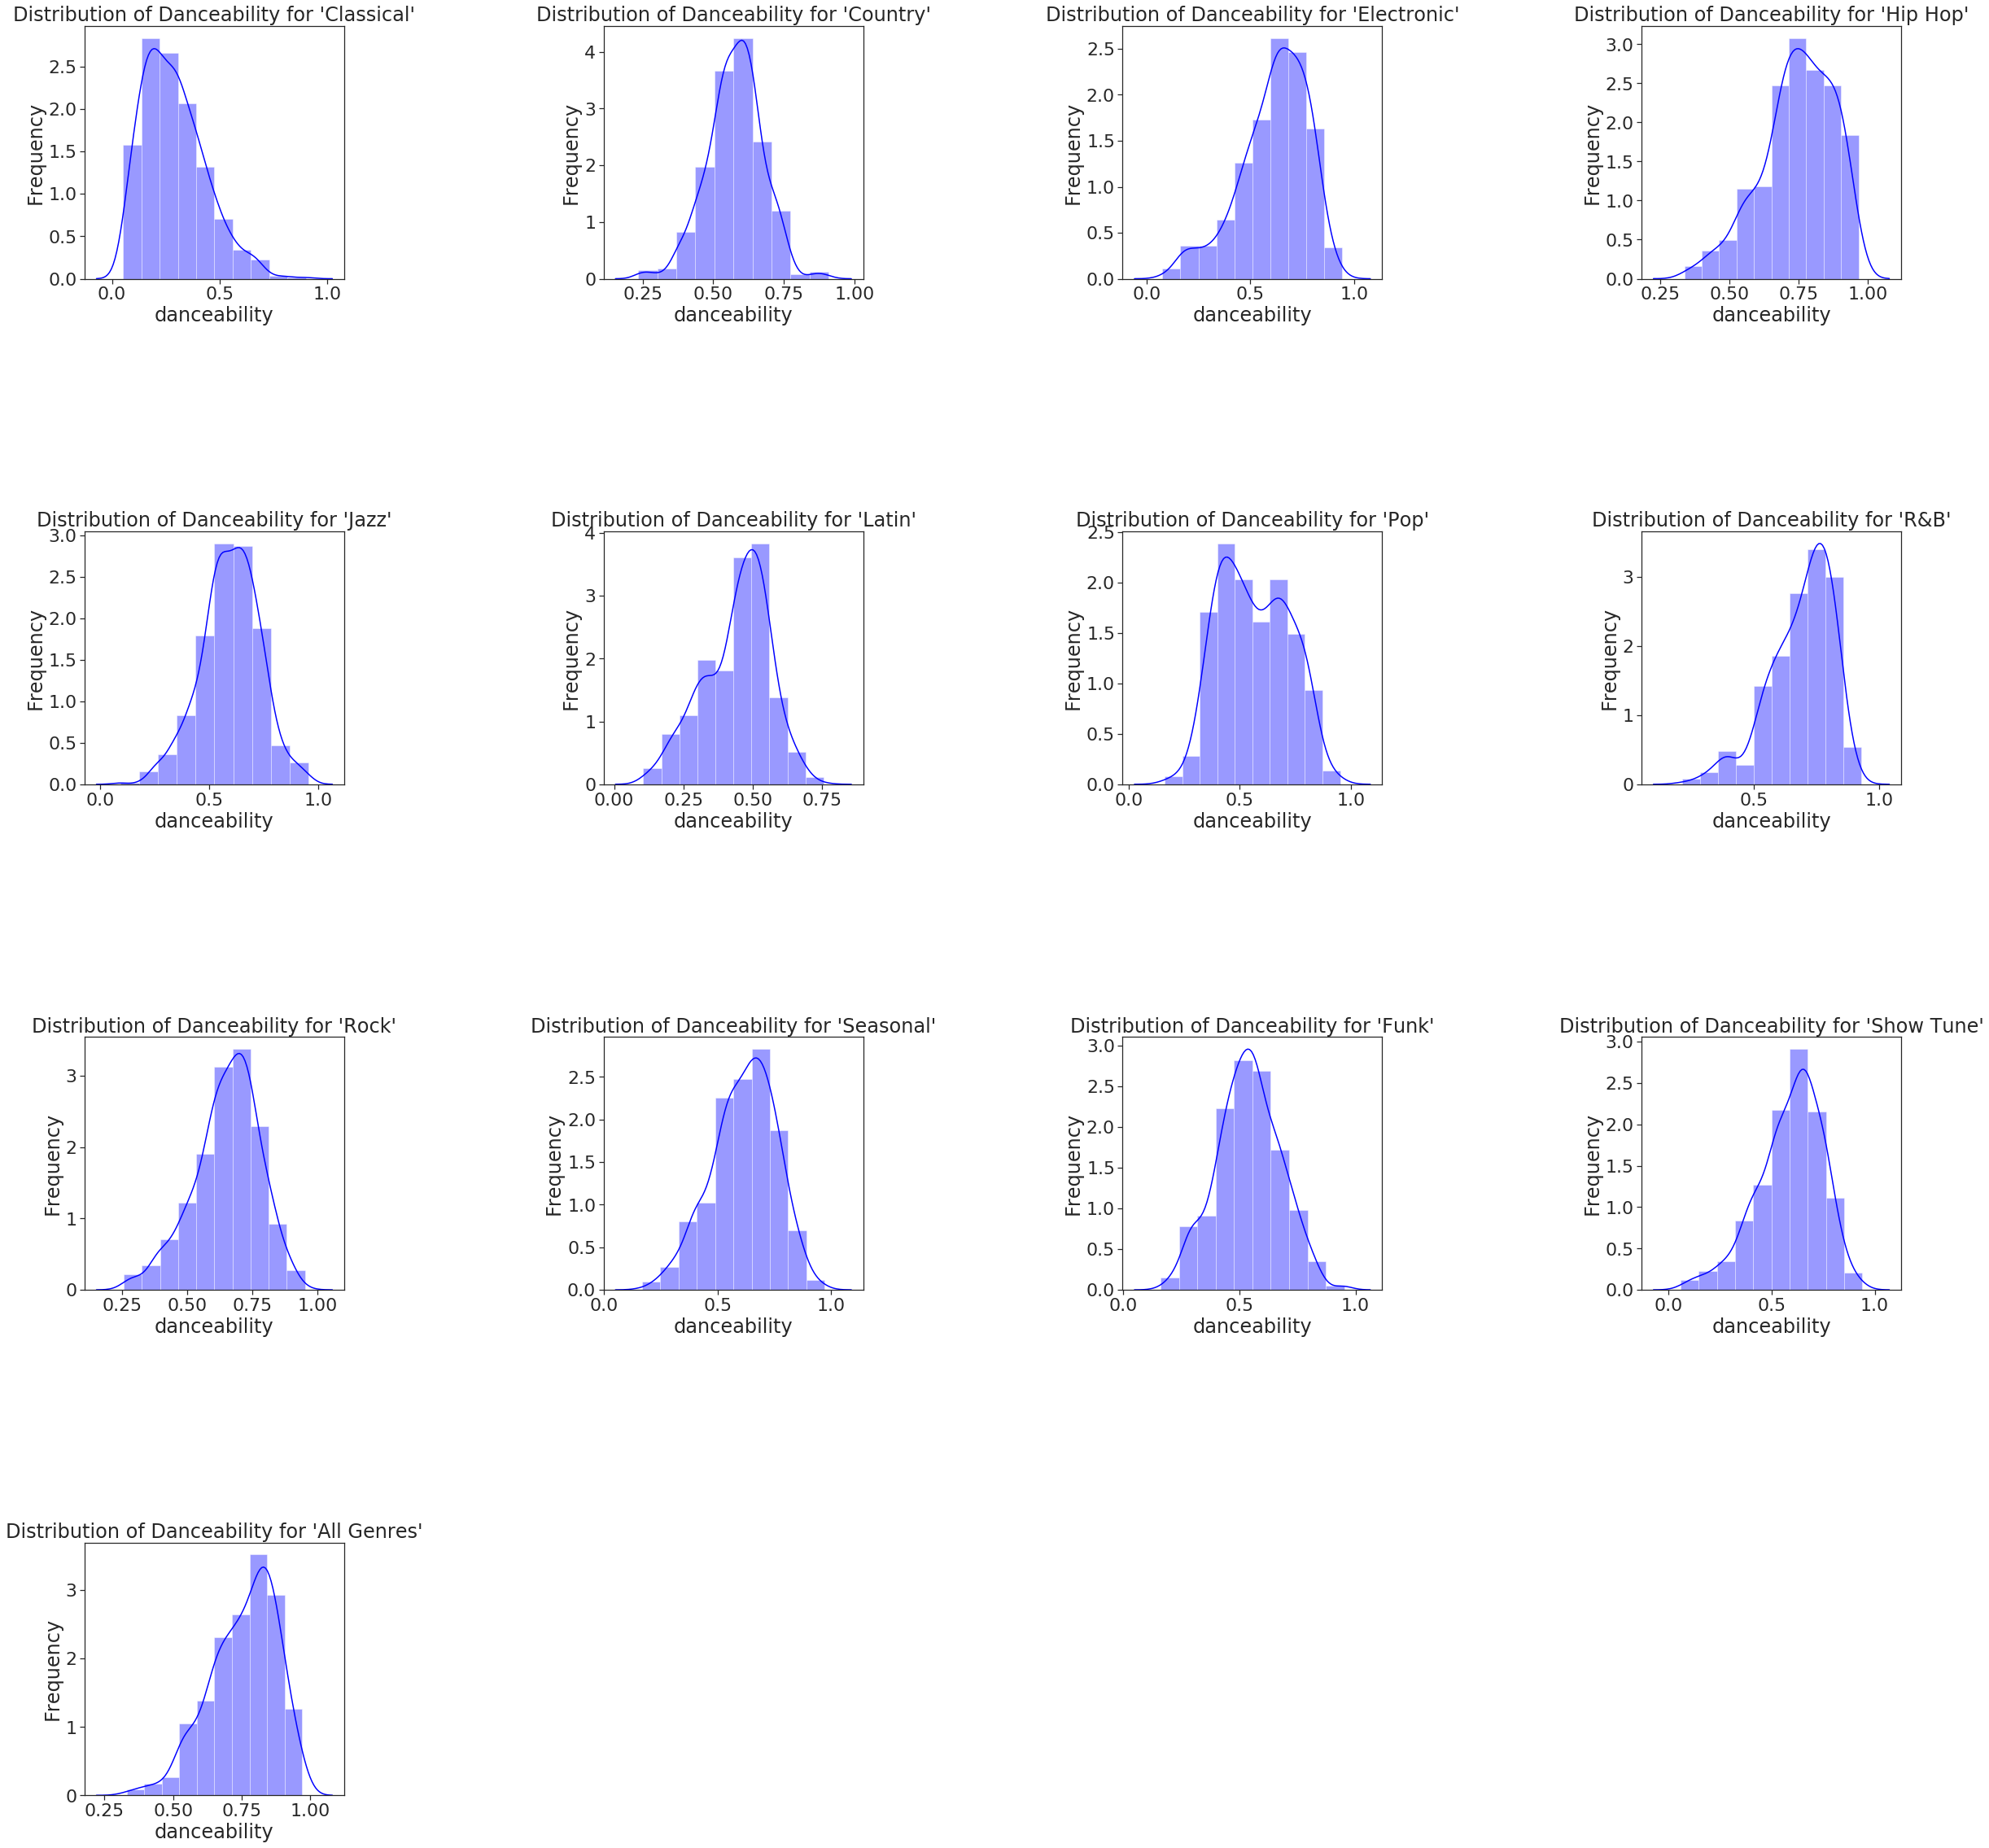

In [138]:
pop_list = [0, df_classical.danceability, df_country.danceability, 
            df_electronic.danceability, 
            df_hiphop.danceability, df_indie.danceability, df_metal.danceability, 
            df_jazz.danceability, df_latin.danceability, df_pop.danceability, 
            df_rb.danceability, df_rock.danceability, df_seasonal.danceability, 
            df_funk.danceability, df_show_tune.danceability, df_final.danceability]

genre = [0, 'Classical', 'Country', 'Electronic', 'Hip Hop', 'Jazz', 'Latin', 'Pop', 'R&B', 'Rock', 'Seasonal', 'Funk', 'Show Tune', 'All Genres']


#create scatterplots of all attributes vs. popularity
fig = plt.figure(figsize = (40, 40))
fig.subplots_adjust(hspace=1, wspace=1)
for i in range(1, 14):
    ax = fig.add_subplot(4, 4, i)
    ax = sns.distplot(pop_list[i], bins=10, color='blue')
    ax.set_title("Distribution of Danceability for '{}'".format(genre[i]))
    ax.set_ylabel('Frequency')
    print(genre[i], pop_list[i].mean())


In [ ]:
#Barplot for number of tracks per genre
#Barplot for average popularity per genre
#pairplot for all track attributes 
#scatterplots of all tracks attributes vs. popularity 
#scatterplots of pop song track attributes vs. popularity 
#scatterplots of most popular song track attributes vs. popularity 
#average popularity over the years 


#new ideas:
#danceability is the only feature of the >90 popularity that has any type of relationship
    #plot the histograms for the genres for danceability 
#r value bootstrap - confidence interval - if the interval is above zero then we can conclude with 95% 
#confidence 

Bootstrap

In [261]:
def bootstrap_variables(df_column, df): 
    number_list = [i for i in range(len(df))] 
    data = list(zip(number_list, df_final[str(df_column)] , df_final['popularity']))
    return data

def bootstrap_sample_r(data, n_bootstrap_samples=10000):
    bootstrap_sample_r = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample_r_2 = []
        bootstrap_sample = np.random.choice(data[random.randint(1, len(data)-1)][0], size=len(data), replace=True)
        x_array = [data[i][1] for i in bootstrap_sample]
        y_array = [data[i][2] for i in bootstrap_sample]
        bootstrap_sample_r.append(linregress(x_array, y_array))
        for i in bootstrap_sample_r: 
            bootstrap_sample_r_2.append(i[2])
    return(bootstrap_sample_r_2)

In [ ]:
#create a list of distinct genres
attribute_list = ['danceability', 'energy', 'key', 'loudness', 'mode',
                                                'speechiness', 'acoustincess', 'instrumentalness', 'liveness',
                                                'valence', 'tempo', 'time_signature', 'danceability']

Text(0, 0.5, 'Frequency')

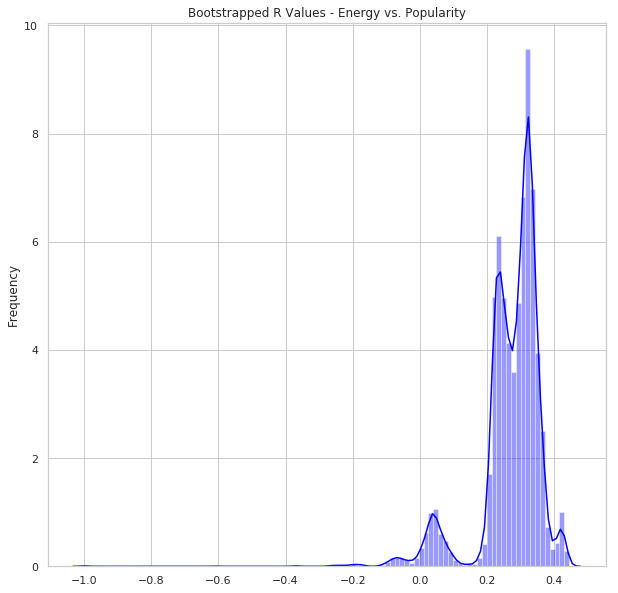

In [266]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('danceability', df_final))

fig= plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.distplot(bootstrap_r, bins=100, color='blue')
ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

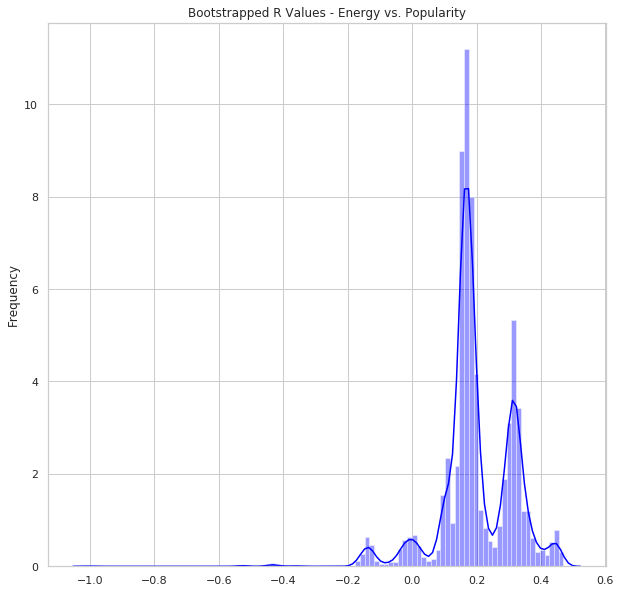

In [267]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('energy', df_final))

fig= plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.distplot(bootstrap_r, bins=100, color='blue')
ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('key', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('loudness', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('mode', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('speechiness', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('loudness', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('acousticness', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('instrumentalness', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('liveness', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('valence', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')

In [ ]:
bootstrap_r = bootstrap_sample_r(bootstrap_variables('tempo', df_final))

# fig= plt.figure(figsize = (10, 10))
# sns.set(style="whitegrid")
# ax = sns.distplot(bootstrap_r, bins=10, color='blue')
# ax.set_title("Bootstrapped R Values - Energy vs. Popularity")
# ax.set_ylabel('Frequency')